In [1]:
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import dateutil.parser
import matplotlib

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [4]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurements', 'stations']

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [6]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [8]:
# Assign the measurements class to a variable called `Measurements`
Measurements = Base.classes.measurements

In [9]:
# Assign the stations class to a variable called `Stations`
Stations = Base.classes.stations

In [10]:
# Create a session
session = Session(engine)

In [11]:
for row in session.query(Measurements.date).limit(100).all():
    print(row)

(datetime.datetime(2010, 1, 1, 0, 0),)
(datetime.datetime(2010, 1, 2, 0, 0),)
(datetime.datetime(2010, 1, 3, 0, 0),)
(datetime.datetime(2010, 1, 4, 0, 0),)
(datetime.datetime(2010, 1, 7, 0, 0),)
(datetime.datetime(2010, 1, 8, 0, 0),)
(datetime.datetime(2010, 1, 9, 0, 0),)
(datetime.datetime(2010, 1, 10, 0, 0),)
(datetime.datetime(2010, 1, 11, 0, 0),)
(datetime.datetime(2010, 1, 12, 0, 0),)
(datetime.datetime(2010, 1, 14, 0, 0),)
(datetime.datetime(2010, 1, 15, 0, 0),)
(datetime.datetime(2010, 1, 16, 0, 0),)
(datetime.datetime(2010, 1, 17, 0, 0),)
(datetime.datetime(2010, 1, 18, 0, 0),)
(datetime.datetime(2010, 1, 19, 0, 0),)
(datetime.datetime(2010, 1, 20, 0, 0),)
(datetime.datetime(2010, 1, 21, 0, 0),)
(datetime.datetime(2010, 1, 22, 0, 0),)
(datetime.datetime(2010, 1, 23, 0, 0),)
(datetime.datetime(2010, 1, 24, 0, 0),)
(datetime.datetime(2010, 1, 25, 0, 0),)
(datetime.datetime(2010, 1, 26, 0, 0),)
(datetime.datetime(2010, 1, 27, 0, 0),)
(datetime.datetime(2010, 1, 28, 0, 0),)
(dateti

In [12]:
session.query(Measurements.date) \
    .filter(Measurements.date>=datetime(2010,1, 1, 0, 0)) \
    .filter(Measurements.date<=datetime(2010,1,2)) \
    .all()

[(datetime.datetime(2010, 1, 1, 0, 0)),
 (datetime.datetime(2010, 1, 2, 0, 0)),
 (datetime.datetime(2010, 1, 1, 0, 0)),
 (datetime.datetime(2010, 1, 2, 0, 0)),
 (datetime.datetime(2010, 1, 1, 0, 0)),
 (datetime.datetime(2010, 1, 2, 0, 0)),
 (datetime.datetime(2010, 1, 1, 0, 0)),
 (datetime.datetime(2010, 1, 2, 0, 0)),
 (datetime.datetime(2010, 1, 1, 0, 0)),
 (datetime.datetime(2010, 1, 2, 0, 0)),
 (datetime.datetime(2010, 1, 1, 0, 0)),
 (datetime.datetime(2010, 1, 2, 0, 0)),
 (datetime.datetime(2010, 1, 1, 0, 0)),
 (datetime.datetime(2010, 1, 2, 0, 0))]

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [13]:
def leap_year(y):
    if y % 400 == 0:
        return True
    if y % 100 == 0:
        return False
    if y % 4 == 0:
        return True
    else:
        return False

def monthDiff(dt,numMonths):
    monthRing = [1,2,3,4,5,6,7,8,9,10,11,12]
    yearsBack = np.int(np.floor(numMonths/12))
    monthsBack = numMonths % 12
    # check for month
    monthCheck = monthRing[dt.month-(monthsBack+1)]
    if monthCheck in [1,3,5,7,8,10,12]:
        return datetime(dt.year-yearsBack,monthCheck,dt.day)
    elif monthCheck in [4,6,9,11]:
        if dt.day > 30:
            return datetime(dt.year-yearsBack,monthCheck,30)
        else:
            return datetime(dt.year-yearsBack,monthCheck,dt.day)
    elif monthCheck in [2]:
        if leap_year(datetime(dt.year-yearsBack,4,1).year) & (dt.day>=29):
            print("ding")
            return datetime(dt.year-yearsBack,monthCheck,29)
        else:
            return datetime(dt.year-yearsBack,monthCheck,28)
            
        return 28
    # need to return a timestamp that is year, month now
    return leapFlag,monthRing[dt.month-(monthsBack+1)],yearsBack

In [14]:
preciptQuery = session.query(Measurements.date,Measurements.prcp) \
    .filter(Measurements.date<=datetime.now()) \
    .filter(Measurements.date>=monthDiff(datetime.now(),12)) \
    .all()

In [15]:
pd.DataFrame(preciptQuery).set_index('date').plot?

Object `plot` not found.


In [ ]:
pd.DataFrame(preciptQuery).set_index('date').plot

In [16]:
df_preciptQuery = pd.DataFrame(preciptQuery).set_index('date')

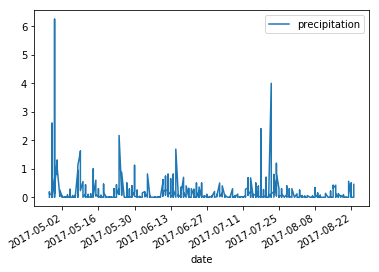

In [18]:
df_preciptQuery.rename(columns={'prcp':'precipitation'}).plot()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [19]:
def getTempMinMaxAvg(sDate,eDate):
    tempObs = session.query(Measurements.date,Measurements.tobs)\
        .filter(Measurements.date>=sDate)\
        .filter(Measurements.date<=eDate).all()
    df1 = pd.DataFrame(tempObs)
    dfmean = df1.groupby('date').mean().reset_index().rename(columns={"tobs":"T (mean)"})
    dfmax = df1.groupby('date').max().reset_index().rename(columns={"tobs":"T (max)"})
    dfmin = df1.groupby('date').min().reset_index().rename(columns={"tobs":"T (min)"})
    dfT = dfmean.set_index('date').join(dfmax.set_index('date').join(dfmin.set_index('date')))
    return dfT
    
def calc_temps(startDate,endDate):
    sDate = dateutil.parser.parse(startDate)
    eDate = dateutil.parser.parse(endDate)
    return getTempMinMaxAvg(sDate,eDate)

In [20]:
dfTrange = calc_temps("2017-4-1","2017-4-15")

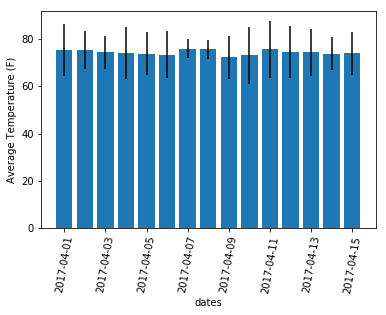

In [21]:
matplotlib.pylab.bar(dfTrange.index,dfTrange['T (mean)'],yerr=(dfTrange['T (max)']-dfTrange['T (min)']))
matplotlib.pylab.xticks(rotation=80)
matplotlib.pylab.xlabel('dates')
matplotlib.pylab.ylabel('Average Temperature (F)')
matplotlib.pylab.show()